# Fine-tuning a Model for Summarization Task

In this task, you will load, preprocess, and fine-tune a T5 model on a dataset of news articles for a summarization task. Follow the steps below carefully.

### Model and Dataset Information

For this task, you will be working with the following:

- **Model Checkpoint**: Use the pre-trained model checkpoint `yalsaffar/mt5-small-Arabic-Summarization` if you face any problem you can use `google-t5/t5-small` but the first one is the correct one for both the model and tokenizer.
- **Dataset**: You will be using the `CUTD/arabic_dialogue_df` dataset. Ensure to load and preprocess the dataset correctly for training and evaluation.

**Note:**
- Any additional steps or methods you include that improve or enhance the results will be rewarded with bonus points if they are justified.
- The steps outlined here are suggestions. You are free to implement alternative methods or approaches to achieve the task, as long as you explain the reasoning and the process at the bottom of the notebook.
- You can use either TensorFlow or PyTorch for this task. If you prefer TensorFlow, feel free to use it when working with Hugging Face Transformers.
- The number of data samples you choose to work with is flexible. However, if you select a very low number of samples and the training time is too short, this could affect the evaluation of your work.

## Step 1: Load the Dataset

Load the dataset and split it into training and test sets. Use 20% of the data for testing.

In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [6]:
!pip install transformers

## Step 2: Load the Pretrained Tokenizer

Initialize a tokenizer from the gevin model checkpoint.

In [3]:
dataset = 'CUTD/arabic_dialogue_df'

In [7]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

from datasets import load_dataset
import pandas as pd

## Step 3: Preprocess the Dataset

Define a preprocessing function that adds a prefix ("summarize:") to each input if needed and tokenizes the text for the model. The labels will be the tokenized summaries.

In [42]:
data = load_dataset(dataset , split ='train[:1000]')

In [9]:
# Load model directly

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [43]:
data

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 1000
})

In [44]:
data = data.train_test_split(test_size=0.2)

In [45]:
data['train']

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 800
})

In [46]:
data['test']

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 200
})

In [89]:
data['train'][:20]

,Unnamed: 0,dialogue,summary
0,434,الشخص 1: مرحبا.أرغب في الحصول على مقعد إلى مدي...,الشخص 1 كتب رحلة غير مبدعة إلى نيويورك وتدفع ن...
1,332,أوليفر: إذن ، يبدأ في المشي دون أن يتطلع إلى ا...,رأى أوليفر وسيد وفيكتور أنه بدأ قتالًا في الكا...
2,959,الشخص 1: أنت تقول إنه سيتم ترقيته إلى المدير ا...,الشخص 1 والشخص 2 أراهن ما إذا كان سيتم ترقية ا...
3,673,الشخص 1: دعنا نلتقي قبل اجتماع الأسبوع المقبل ...,سيلتقي الشخص 1 بجين بعد ظهر يوم الاثنين حوالي ...
4,656,الشخص 1: مهلا ، هل تعرف ما إذا كان من الممكن ا...,يسأل الشخص 1 الشخص 2 كيفية الوصول إلى لوس أنجل...
5,347,تاتوم: هل تريد سكايب؟\n تيفاني: لا لست الآن مش...,تاتوم تدرس اللغة الإنجليزية في رياض الأطفال ، ...
6,622,الشخص 1: ستيفن ، الساعة العاشرة.أنا ذاهب إلى ا...,يريد ستيفن البقاء مستيقظًا لتجاوز ميزانية الأس...
7,128,الشخص 1: إنه لأمر مدهش بالنسبة لي كيف أصبحت ال...,يخبر الشخص 1 الشخص 2 أن الناس سيجدون عناصر مست...
8,557,الشخص 1: شكرًا على مجيئه اليوم.تفضل بالجلوس.اخ...,ينطبق الشخص 2 على وظيفة في محطة إذاعية.الشخص 1...
9,437,ليام: يا صاح تركت هاتفك في مكاني؟\n إنديانا: م...,غادر شخص ما هاتفًا في مكان ليام ، لكنه لم يكن ...


In [47]:
data.set_format('pandas')
df = data['train'][:]
df.head()

,Unnamed: 0,dialogue,summary
0,434,الشخص 1: مرحبا.أرغب في الحصول على مقعد إلى مدي...,الشخص 1 كتب رحلة غير مبدعة إلى نيويورك وتدفع ن...
1,332,أوليفر: إذن ، يبدأ في المشي دون أن يتطلع إلى ا...,رأى أوليفر وسيد وفيكتور أنه بدأ قتالًا في الكا...
2,959,الشخص 1: أنت تقول إنه سيتم ترقيته إلى المدير ا...,الشخص 1 والشخص 2 أراهن ما إذا كان سيتم ترقية ا...
3,673,الشخص 1: دعنا نلتقي قبل اجتماع الأسبوع المقبل ...,سيلتقي الشخص 1 بجين بعد ظهر يوم الاثنين حوالي ...
4,656,الشخص 1: مهلا ، هل تعرف ما إذا كان من الممكن ا...,يسأل الشخص 1 الشخص 2 كيفية الوصول إلى لوس أنجل...


In [48]:
df = data['train'][:]
df_test = data['test'][:]

In [49]:
df.head()

,Unnamed: 0,dialogue,summary
0,434,الشخص 1: مرحبا.أرغب في الحصول على مقعد إلى مدي...,الشخص 1 كتب رحلة غير مبدعة إلى نيويورك وتدفع ن...
1,332,أوليفر: إذن ، يبدأ في المشي دون أن يتطلع إلى ا...,رأى أوليفر وسيد وفيكتور أنه بدأ قتالًا في الكا...
2,959,الشخص 1: أنت تقول إنه سيتم ترقيته إلى المدير ا...,الشخص 1 والشخص 2 أراهن ما إذا كان سيتم ترقية ا...
3,673,الشخص 1: دعنا نلتقي قبل اجتماع الأسبوع المقبل ...,سيلتقي الشخص 1 بجين بعد ظهر يوم الاثنين حوالي ...
4,656,الشخص 1: مهلا ، هل تعرف ما إذا كان من الممكن ا...,يسأل الشخص 1 الشخص 2 كيفية الوصول إلى لوس أنجل...


In [50]:
df.shape

(800, 3)

In [51]:
df['summary_length'] = df['summary'].str.len()
df['dialogue_length'] = df['dialogue'].str.len()

In [52]:
df.head()

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
0,434,الشخص 1: مرحبا.أرغب في الحصول على مقعد إلى مدي...,الشخص 1 كتب رحلة غير مبدعة إلى نيويورك وتدفع ن...,67,367
1,332,أوليفر: إذن ، يبدأ في المشي دون أن يتطلع إلى ا...,رأى أوليفر وسيد وفيكتور أنه بدأ قتالًا في الكا...,76,656
2,959,الشخص 1: أنت تقول إنه سيتم ترقيته إلى المدير ا...,الشخص 1 والشخص 2 أراهن ما إذا كان سيتم ترقية ا...,51,249
3,673,الشخص 1: دعنا نلتقي قبل اجتماع الأسبوع المقبل ...,سيلتقي الشخص 1 بجين بعد ظهر يوم الاثنين حوالي ...,69,254
4,656,الشخص 1: مهلا ، هل تعرف ما إذا كان من الممكن ا...,يسأل الشخص 1 الشخص 2 كيفية الوصول إلى لوس أنجل...,95,548


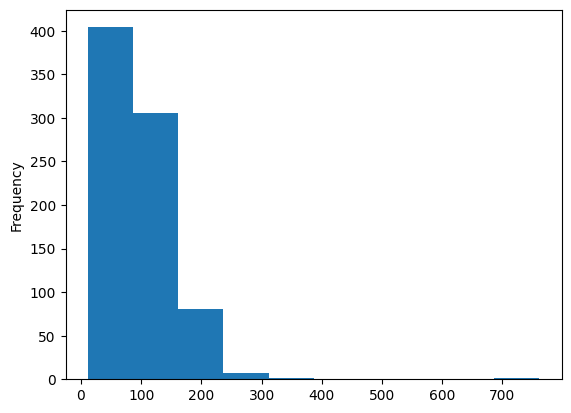

In [53]:
df['summary_length'].plot(kind = 'hist');

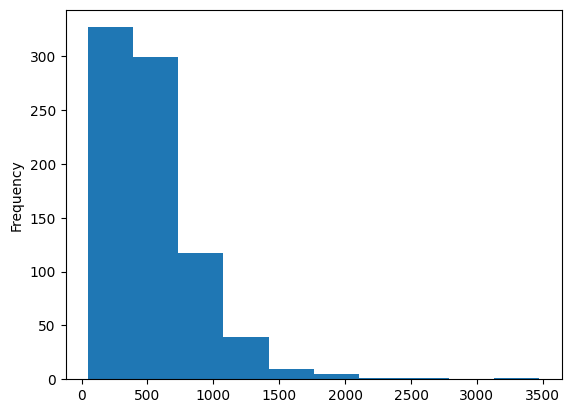

In [54]:
df['dialogue_length'].plot(kind = 'hist');

In [55]:
df.sample(5)

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
594,598,ميليسا: مرحبا حبيبتي\n هانز: مرحبا عزيزتي\n مي...,ميليسا تسأل هانز عن المزيد من ملفات تعريف الار...,61,410
296,423,الشخص 1: ما نوع الملاحظة التي تتناولها هناك.هذ...,الشخص 1 يعتقد أن ملاحظة الشخص 2 تبدو وكأنها شا...,135,549
352,114,الشخص 1: مرحبًا ، جاك هنا.\n الشخص 2: مرحبا ،...,ماري تدعو جاك وتدعوه لتناول العشاء.جاك مشغول و...,97,705
227,653,رينيه: <file_other>\n رينيه: لا تبدو سيئة لا: ...,تم تسجيل رينيه رقص الفالس مع مدرسها.كاتي تعتقد...,62,686
277,826,الشخص 1: جينيفر ، أنا فقط أقرأ هذا الكتاب المذ...,تحكي شافيز القصة في كتاب مذهل لجنيفر وسوف يقرض...,55,619


In [56]:
!pip install pyarabic

In [57]:
import re
from pyarabic.araby import strip_tashkeel , strip_harakat , strip_tatweel , normalize_hamza

In [60]:
numbers = r'[\d+]'
punct = r'[^\w\s]'
pattern_n =r'[^[[\w][\n]'
pattern_eng = r'([A-Za-z])\w+'


In [61]:
def clean_data(text):
  text = re.sub(numbers , '' , text)
  text = re.sub(pattern_n , ' ' , text)
  text = re.sub(pattern_eng , '' , text)
  text = re.sub(punct , '' , text)
  text = strip_tashkeel(text)
  text = normalize_hamza(text)


  return text

In [62]:
df['summary'] = df['summary'].apply(clean_data)
df['dialogue'] = df['dialogue'].apply(clean_data)


In [63]:
df.head()

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
0,434,الشخص مرحباءرغب في الحصول على مقعد ءلى مدينة ...,الشخص كتب رحلة غير مبدعة ءلى نيويورك وتدفع نق...,67,367
1,332,ءوليفر ءذن يبدء في المشي دون ءن يتطلع ءلى الس...,رءى ءوليفر وسيد وفيكتور ءنه بدء قتالا في الكاف...,76,656
2,959,الشخص ءنت تقول ءنه سيتم ترقيته ءلى المدير الع...,الشخص والشخص ءراهن ما ءذا كان سيتم ترقية الرجل,51,249
3,673,الشخص دعنا نلتقي قبل اجتماع الءسبوع المقبل ج...,سيلتقي الشخص بجين بعد ظهر يوم الاثنين حوالي ث...,69,254
4,656,الشخص مهلا هل تعرف ما ءذا كان من الممكن الوص...,يسءل الشخص الشخص كيفية الوصول ءلى لوس ءنجلوس...,95,548


In [64]:
df_test['summary'] = df_test['summary'].apply(clean_data)
df_test['dialogue'] = df_test['dialogue'].apply(clean_data)

In [65]:
df_test.head()

,Unnamed: 0,dialogue,summary
0,59,ناتالي ناتالي في التقدم\n كريستين واو ءنه را...,ءرسلت ناتالي صورة لكريستين وداناءنها تكمل على ...
1,907,الشخص اليوم لقد دعا ضيفا خاصا البروفيسوريان...,البروفيسوريقدم يانغ بعض النصاءح حول الجوانب ال...
2,913,الشخص لقد انتهيتيمكنني مشاهدة التلفزيون الش...,تطلب والدة الشخص من الشخص ءن يءخذ الفيتامينا...
3,229,الشخص كيف اللحومهل نذهب جميعا لتناول وجبة في ...,يقرر الشخص والشخص الذهاب ءلى الجزر حيث يمكن ...
4,985,ءءدم ءنا جاءع جدا\n ءءدم هل لديك ءي وصفات جديد...,ءءدم جاءع واتباع نصيحة شون سوف يبحث عن وصفات ...


In [66]:
df['summary']

,summary
0,الشخص كتب رحلة غير مبدعة ءلى نيويورك وتدفع نق...
1,رءى ءوليفر وسيد وفيكتور ءنه بدء قتالا في الكاف...
2,الشخص والشخص ءراهن ما ءذا كان سيتم ترقية الرجل
3,سيلتقي الشخص بجين بعد ظهر يوم الاثنين حوالي ث...
4,يسءل الشخص الشخص كيفية الوصول ءلى لوس ءنجلوس...
...,...
795,تريد كلير الوصول ءلى برنامج الدكتوراه في الدرا...
796,يخبر الشخص الشخص كيفية ءرسال هدية بالبريد
797,يتفاوض الشخص والشخص بشءن تفاصيل تجارتهما بم...
798,الشخص يءمن بالءجسام الغريبة ويمكنه رءيتهم في ...


In [67]:
def preprocess_function(examples):
    inputs = ["summarize: " + doc for doc in examples['dialogue']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True,padding=True,return_tensors='tf')

#Tokenize the labels
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['summary'], max_length=150, truncation=True,padding=True,return_tensors='tf')

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

In [68]:
from datasets import DatasetDict , Dataset
df_train = Dataset.from_pandas(pd.DataFrame(df,columns=df.columns))
df_test = Dataset.from_pandas(pd.DataFrame(df_test,columns=df_test.columns))


## Step 4: Define the Data Collator

Use a data collator designed for sequence-to-sequence models, which dynamically pads inputs and labels.

In [69]:
tokin_data_train=df_train.map(preprocess_function,batched=True)
tokin_data_test=df_test.map(preprocess_function,batched=True)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [70]:
from transformers import DataCollatorForSeq2Seq
import tensorflow as tf

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

## Step 5: Load the Pretrained Model

Load the model for sequence-to-sequence tasks (summarization).

In [71]:
from transformers import TFT5ForConditionalGeneration
model = TFT5ForConditionalGeneration.from_pretrained('yalsaffar/mt5-small-Arabic-Summarization')

You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.
/usr/local/lib/python3.10/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


## Step 6: Define Training Arguments

In [72]:
tokin_data_train

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary', 'summary_length', 'dialogue_length', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 800
})

Set up the training configuration with parameters like learning rate, batch size, and number of epochs.

In [73]:
tf_train_set = tokin_data_train.to_tf_dataset(columns=['input_ids','attention_mask','labels'],
    label_cols=['labels'],
    #tokenizer=tokin_data_train,
    shuffle=True,
    batch_size=8,
    collate_fn=data_collator,
)
tf_test_set = tokin_data_test.to_tf_dataset(columns=['input_ids','attention_mask','labels'],
    label_cols=['labels'],
    #tokenizer=tokin_data_train,
    shuffle=False,
    batch_size=8,
    collate_fn=data_collator,
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


## Step 7: Initialize the Trainer

Use the `Seq2SeqTrainer` class to train the model.

## Step 8: Fine-tune the Model

Train the model using the specified arguments and dataset.

In [86]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])

In [75]:
model.fit(tf_train_set, validation_data=tf_test_set, epochs=1)


100/100 [==============================] - 189s 1s/step - loss: 0.3881 - accuracy: 0.9603 - val_loss: 0.0430 - val_accuracy: 0.9899


In [87]:
test_model=model.fit(tf_train_set, validation_data=tf_test_set, epochs=1)


100/100 [==============================] - 167s 1s/step - loss: 0.0556 - accuracy: 0.9904 - val_loss: 0.0406 - val_accuracy: 0.9899


In [77]:
model.save_pretrained('group1')
tokenizer.save_pretrained('/content/group1model')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128, 'num_beams': 15, 'length_penalty': 0.6, 'no_repeat_ngram_size': 2}


('/content/group1model/tokenizer_config.json',
 '/content/group1model/special_tokens_map.json',
 '/content/group1model/spiece.model',
 '/content/group1model/added_tokens.json',
 '/content/group1model/tokenizer.json')

## Step 9: Inference

Once the model is trained, perform inference on a sample text to generate a summary. Use the tokenizer to process the text, and then feed it into the model to get the generated summary.

In [78]:
def generate_summary(text):
    input_ids = tokenizer("summarize: " + text, return_tensors="tf").input_ids
    outputs = model.generate(input_ids)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary
sample_text = """
علم البيانات (بالإنكليزية: Data science) علم يغلب عليه تداخل الاختصاصات والذي يقوم على استخدام الأساليب العلمية، والمعالجات والخوارزميات والنظم لاستخراج المعرفة والأفكار من البيانات بشكليها، سواء مُهيكلة، أو غير مهيكلة، بشكل مشابه للتنقيب في البيانات. كما يعتمد علم البيانات على تقنيات تعلم الآلة والذكاء الصناعي وبرامج معالجة البيانات الضخمة. يُسمى الخبير بها عالم بيانات (بالإنكليزية: Data scientist).

ويُعرف علم البيانات بأنه «مفهوم قائم على توحيد الإحصاء، وتحليل البيانات وتعلم الآلة والوسائل المرتبطة بهم من أجل فهم وتحليل ظاهرة فعلية باستخدام البيانات».

وهو يقوم بتوظيف نظريات وأساليب مستمدة من حقول معرفية متعددة في سياق الرياضيات والإحصاء وعلم المعلومات وعلوم الحاسب."""
print(generate_summary(sample_text))

In [88]:
from transformers import pipeline
model=pipeline('summarization',model=test_model)
model(sample_text)

TypeError: Could not infer framework from class <class 'tf_keras.src.callbacks.History'>.